# scatter plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# i just wanna find out the scatter for the median sal VS job counts for the data analyst role since im applying for it

df_da = df[df['job_title_short']=='Data Analyst']

df_da.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."


In [3]:
# Expanding the df by the job_skills column

df_da = df_da.explode('job_skills')

In [8]:
# Phew i did a lot in this one cell. Group by job_skills > Count the no. of jobs for each skill >
# Find the median salary for each of those skills > And then finally sort it in a descending order
# And i also took only top 10 skills

skills_df = df_da.groupby('job_skills').agg(
    skill_count=('job_skills', 'size'),
    median_salary=('salary_year_avg', 'median')
).sort_values('skill_count', ascending=False).head(20)

In [9]:
skills_df

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


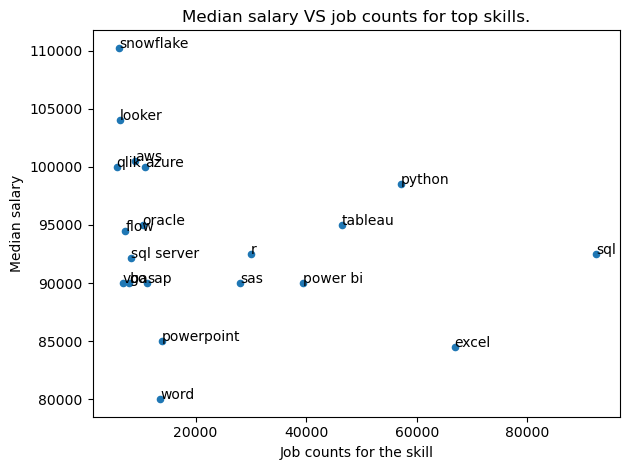

In [10]:
# finally plotting a scatter plot for that

skills_df.plot(kind='scatter', x='skill_count', y='median_salary', title='Median salary VS job counts for top skills.')
plt.xlabel('Job counts for the skill')
plt.ylabel('Median salary')
for i, txt in enumerate(skills_df.index):
    plt.text(skills_df['skill_count'].iloc[i], skills_df['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()


# Cleaning up the viz

pip install adjustText # -- Need this to make the dots more sorted and have an arrow pointed to itself 
                       #    the area is too dense


# much better

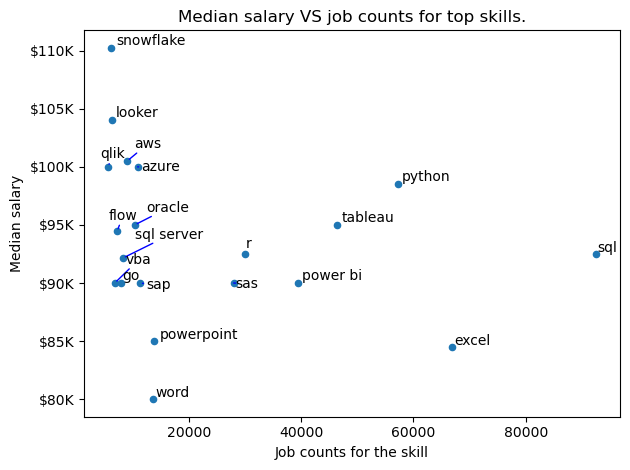

In [16]:
from adjustText import adjust_text

skills_df.plot(kind='scatter', x='skill_count', y='median_salary', title='Median salary VS job counts for top skills.')
texts = []
plt.xlabel('Job counts for the skill')
plt.ylabel('Median salary')
for i, txt in enumerate(skills_df.index):
    texts.append(plt.text(skills_df['skill_count'].iloc[i], skills_df['median_salary'].iloc[i], txt))
    
adjust_text(texts,  arrowprops=dict(arrowstyle='-', color='blue', lw=1))
ax  = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()
